# COVID Tweets - Sentiment Analysis and Trends 

### Abstract
Nowadays, Social media penetration has become a very significant need because of usages in various aspects of life. Social Media application Twitter has become a part and parcel of one’s life in this booming technological 21st Century, which facilitates the provision of freedom of speech to people, to provide information, and to discuss important social as well as ethical issues that are increasingly becoming complex to tackle with. But everything in this world has two sides likewise a rupee coin. First and foremost problem is the disbursals of fake news, because of which harmony and peace would be disrupted because of it. Secondly, the tweets that spread hatred or seemingly termed as hate mongering speeches by the various people for their own gains, has been a serious threat to the three pillars of the country. Moreover, During the COVID pandemic, sentiment Analysis on twitter, can be a very useful tool to help policymakers gain insight into social media data trends. 

### Introduction
The worldwide coronavirus pandemic has led to the establishment of worldwide curfews, quarantines and lockdown to mitigate further spread of the virus. During this time, it can be helpful to track the public's responses to these changes. This study aims to answer the following questions: 
1. How do people feel during the crisis? 
2. How does the general public sentiment change over time? 
3. What are the topics that most contribute to this sentiment shift? 

I filtered the data to only include tweets in English for ease of study. This section summarizes the result with a few graphs generated by the code in the latter section of the notebook. 

### Sentiment Analysis
During the COVID pandemic, [sentiment Analysis](https://monkeylearn.com/sentiment-analysis/) can be a very useful tool to help policymakers gain insight into social media data trends. Normally, sentiment analysis requires training an ML model using labelled data. However, since we don't have training data in this dataset, we opt to use pre-training modeled from the "TextBlob" package, as performed in this [example] Although not a state-of-the-art model, it at least gives reasonable results. (I confirmed a few output cases with manual spot checks.)

From the graphs of Sentiment over Time, we notice that: 
* The overall sentiment increased in positivity by about 4% throughout the month of April, while tweet volume decreased slightly. This may reflect gradual subsiding of initial panic.
* The end of April saw a positivity spike of about 2%, which occurs right before re-opening in the USA. This boosted sentiment may be caused by an increase in morale attributed to the re-opening policy decision.

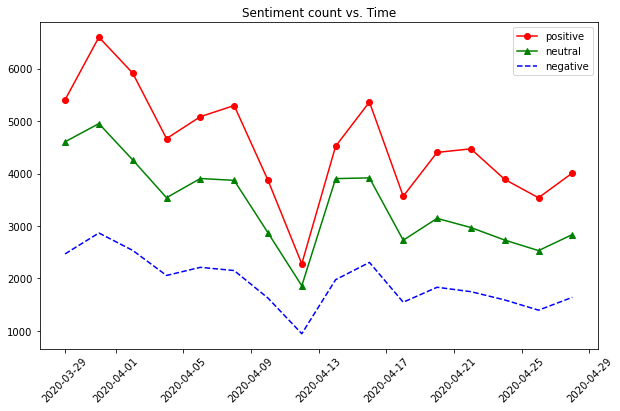
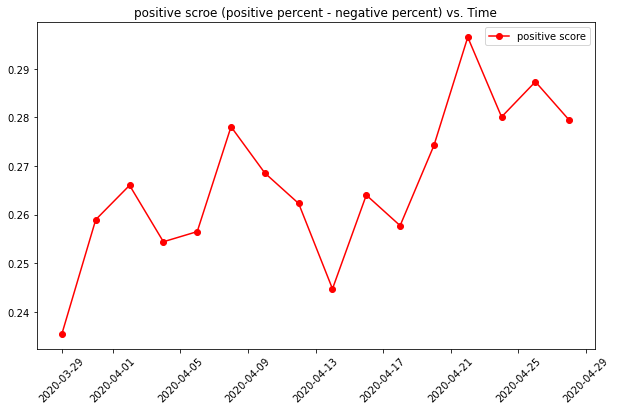

**Error analysis**: 
* The Sentiment trend graph is prone to random noise/variance if not given enough data points. On the other hand, with too many data points, the notebook runs very slowly. After tuning the data size, I confirmed that the graph is stable when the random sample partition is changed.
* I do not have measurement of the error/bias for the sentiment analysis using the "TextBlob" package library. The result seems reasonable based on manual spot checks. 

### Topic-Specific Sentiment Analysis
To answer question #3 (What are the topics that contributed to people's sentiment?), we need to gain some insights into what people are discussing in the Twitter posts. To do that, I first tried "topic modeling" with [Latent Dirichlet allocation(LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) in this [notebook](https://www.kaggle.com/esthercao/covid-topic-modelling-lda). However, the topics in COVID-related tweets seem too nuanced for the basic LDA library that I used, and the result was not promising. 

I then extracted tags and account names from the tweet corpus. This seemed to give good insights into what subjects people talk about. 

Observations from the below graphs: 
A. Negative
* In USA, negative sentiment are related to political issues such as @GOP, @WhiteHouse, @SpeakerPolosi, #donaldtrump, @FoxNews (a conservative news network), #chinesevirus/#wuhanvirus (controversial term popularized by President Trump), #trumpvirus, #maga (make america great again), @POTUS/@realDonaldTrump/#trump.
* In Britian, negative sentiment tend to be related to prominent public figures testing positive for the virus: @MattHancock, #borisjohnson. 
B. Positive
* Positive tweets seem to relate less to specific countries and more to universal topics: #love, #inthistogether, #washyourhands, #stayhomeandstaysafe. 
* The lack of topics from users in other countries (India, Austria, Canada) among the English dataset may require further investigation. Possible explanations include: they are more positive in general, are less outspoken about negative topics, or use Twitter hashtags less often.






# Importing Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

import re
from collections import Counter
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         if (filename.endswith('Tweets.CSV')) :
#             print(os.path.join(dirname, filename))

In [2]:
!pip list

Package                            Version             Location
---------------------------------- ------------------- --------------
absl-py                            0.9.0
adal                               1.2.2
affine                             2.3.0
aiohttp                            3.6.2
alabaster                          0.7.12
albumentations                     0.4.6
alembic                            1.4.2
allennlp                           1.0.0
altair                             4.1.0
anaconda-client                    1.7.2
anaconda-project                   0.8.3
annoy                              1.16.3
ansiwrap                           0.8.4
appdirs                            1.4.3
argh                               0.26.2
arrow                              0.15.5
arviz                              0.9.0
asn1crypto                         1.3.0
astroid                            2.3.3
astropy                            4.0.1.post1
astunparse                         1

# Reading Data

In [3]:
# Reading data
# df=pd.read_csv('/kaggle/input/coronavirus-covid19-tweets-early-april/2020-03-29 Coronavirus Tweets.CSV', skiprows=lambda i: i!=0 and (i) % 1000 != 0)

# Read all files and down-sample
df2 = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if (filename.endswith('Tweets.CSV')):
            df2.append(pd.read_csv(os.path.join(dirname, filename), header=0, skiprows=lambda i: i!=0 and (i) % 50 != 0))
df = pd.concat(df2, axis=0, ignore_index=True)

df.head()
df.shape

(292123, 22)

# Cleaning Data

In [4]:
# display columns
print ("original columns: ")
df.columns

# dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head()

original columns: 


,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-03T00:00:00Z,"مستشار وزارة الصحة الإيرانية: ""البلدان الأخرى ...",754,1,NaN,ar
1,2020-04-03T00:00:00Z,Time is of the essence!!! Trump’s delayed resp...,1263,21,NaN,en
2,2020-04-03T00:00:02Z,El #coronavirus también pone en evidencia la b...,3940,2,NaN,es
3,2020-04-03T00:00:07Z,I kinda like that @MayorJohnsonSAV. I appreci...,12538,0,NaN,en
4,2020-04-03T00:00:14Z,#SocialDistance #COVID19 https://t.co/Az6HfdnAH6,669,0,NaN,und


In [5]:
# filtering data with 'country_code = US' and 'language = en'
# (tweet.country_code == "US") & 
tweet =tweet[(tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['country_code','lang'],axis=1,inplace=True)

# check missing values
# tweet.isna().sum()

tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-03T00:00:00Z,Time is of the essence!!! Trump’s delayed resp...,1263,21
1,2020-04-03T00:00:07Z,I kinda like that @MayorJohnsonSAV. I appreci...,12538,0
2,2020-04-03T00:00:32Z,How elegantly put.. ABC.. of #COVID19 https://...,4118,0
3,2020-04-03T00:00:37Z,#Covid19 has affected many businesses in vario...,2342,0
4,2020-04-03T00:00:44Z,"In this free report, Money Morning analyst Lac...",2780,0


# Inspect data

In [6]:
# shape
tweet.shape

# # Top 5 most favourited tweets:
# fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
# for i in range(5):
#     print(i,']', fav['text'][i],'\n')
    
# #Top 5 most retweeted tweets:
# retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
# for i in range(5):
#     print(i,']', retweet['text'][i],'\n')

(162400, 4)

### Word Cloud : 
This word cloud doesn't help answer our questions, but is an interesting visualization. The following words can be seen: "COVID19", "resp", "Trump", "affected", "businesses"

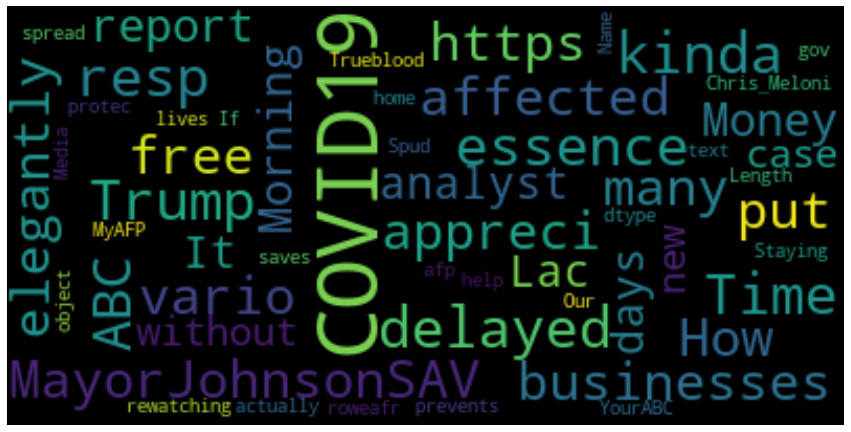

In [7]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

# Feature Extraction

In [8]:
# Extracting hashtags and accounts
stoptags = ['#covid19', '#covid_19', '#covid-19', '#covid', '#coronavirus', '#outgreak', '#virus', '#pandemic']

tweet['tags'] = tweet['text'].str.findall(r'(?:(?<=\s)|(?<=^))#.*?(?=\s|$|\.,)')
tweet['tags'] = tweet['tags'].apply(lambda word_list:list(map(lambda w: w.lower(), word_list))).apply(lambda word_list:list(filter(lambda w: w not in stoptags, word_list)))

tweet['accts'] = tweet['text'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)')
tweet['entity_text'] = tweet['tags'].apply(' '.join) + ' ' + tweet['accts'].apply(' '.join)
tweet.head()

,created_at,text,favourites_count,retweet_count,tags,accts,entity_text
0,2020-04-03T00:00:00Z,Time is of the essence!!! Trump’s delayed resp...,1263,21,[#medicareforall],[],#medicareforall
1,2020-04-03T00:00:07Z,I kinda like that @MayorJohnsonSAV. I appreci...,12538,0,[#coronavirus.],[@MayorJohnsonSAV.],#coronavirus. @MayorJohnsonSAV.
2,2020-04-03T00:00:32Z,How elegantly put.. ABC.. of #COVID19 https://...,4118,0,[],[],
3,2020-04-03T00:00:37Z,#Covid19 has affected many businesses in vario...,2342,0,[],[],
4,2020-04-03T00:00:44Z,"In this free report, Money Morning analyst Lac...",2780,0,[],[],


# Data Processing

In [9]:
# Tokenizing and Removing special charactors
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    time is of the essence trump s delayed respons...
1    i kinda like that i appreciate how straight up...
2                     how elegantly put abc of covid19
3    covid19 has affected many businesses in variou...
4    in this free report money morning analyst lach...
Name: text, dtype: object

In [10]:
#Removing Stop Words
stopwords

tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    time essence trump s delayed response will cos...
1    kinda appreciate straight savannah cope corona...
2                            elegantly put abc covid19
3    covid19 affected many businesses various indus...
4    free report money morning analyst lachlann tie...
Name: text, dtype: object

## Analyzing Text for Sentiment

Using TextBlob to analyze tweets to predict text sentiment and categorize as 'Positive', 'Negative' or 'Neutral'.

In [11]:
%time
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
pd.set_option('display.max_colwidth', 400)
tweet.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 15.3 µs


,created_at,text,favourites_count,retweet_count,tags,accts,entity_text,sentiment,polarity
0,2020-04-03T00:00:00Z,time essence trump s delayed response will cost thousands american lives coronavirus medicareforall,1263,21,[#medicareforall],[],#medicareforall,neutral,0
1,2020-04-03T00:00:07Z,kinda appreciate straight savannah cope coronavirus,12538,0,[#coronavirus.],[@MayorJohnsonSAV.],#coronavirus. @MayorJohnsonSAV.,positive,0.2
2,2020-04-03T00:00:32Z,elegantly put abc covid19,4118,0,[],[],,positive,0.5
3,2020-04-03T00:00:37Z,covid19 affected many businesses various industries unexpectedly many zero waste businesses seeing boost,2342,0,[],[],,positive,0.2
4,2020-04-03T00:00:44Z,free report money morning analyst lachlann tierney reveals two assets set benefit coronavirus crisis worsens click link claim copy today,2780,0,[],[],,positive,0.4


positive    74784
neutral     55942
negative    31674
Name: sentiment, dtype: int64


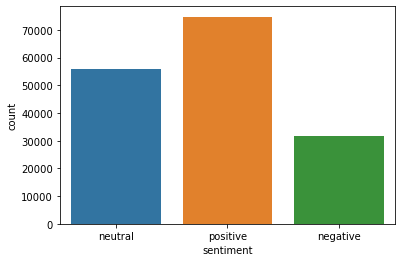

In [12]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

### Expore favorite and retweet counts
A quick look at these showed that they are mostly inline with tweet count. So, we will just use tweet count for our study.

In [13]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,491647134
neutral,712209451
positive,896452379


In [14]:
count = pd.DataFrame(tweet.groupby('sentiment')['retweet_count'].sum())
count.head()

,retweet_count
sentiment,
negative,200519
neutral,137032
positive,259451


## Sentiment Distribution

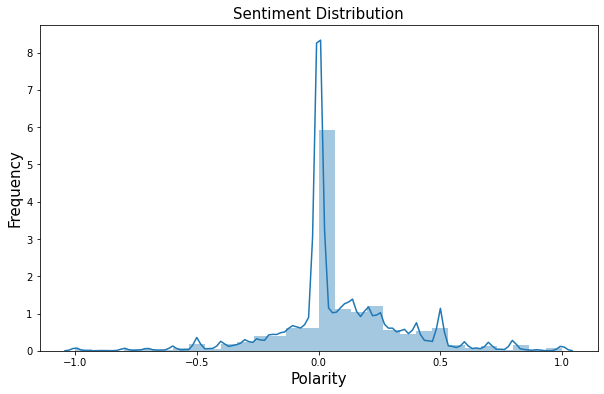

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

## Sentiment Over Time

In [16]:
# format timestamp
tweet['created_at'] = pd.to_datetime(tweet['created_at'])
tweet['created_at'] = pd.IntervalIndex(pd.cut(tweet['created_at'], pd.date_range('2020-03-29', '2020-05-01', freq='2880T'))).left

# count sentiment
tweet_count1 = tweet.groupby(['created_at','sentiment'])['text'].count().reset_index().rename(columns={'text':'count'})
tweet_count1.head()

# check missing values
# tweet_count1.isna().sum()

,created_at,sentiment,count
0,2020-03-29 00:00:00+00:00,negative,2467
1,2020-03-29 00:00:00+00:00,neutral,4605
2,2020-03-29 00:00:00+00:00,positive,5406
3,2020-03-31 00:00:00+00:00,negative,2866
4,2020-03-31 00:00:00+00:00,neutral,4952


# Tags with the most Negative and Postive Sentiment

In [17]:
all_words = []
all_words = [word for i in tweet.entity_text for word in i.split()]
pos_words = tweet['entity_text'][tweet['sentiment'] == 'positive']
neg_words = tweet['entity_text'][tweet['sentiment'] == 'negative']
neutral_words = tweet['entity_text'][tweet['sentiment'] == 'neutral']
# show_wordcloud(pos_words , 'POSITIVE')
# show_wordcloud(neg_words , 'NEGATIVE')
# show_wordcloud(neutral_words , 'NEUTRAL')

def get_freq(word_list):
    freq = Counter(word_list).most_common(100)
    freq = pd.DataFrame(freq)
    freq.columns = ['word', 'frequency']
    return freq

all_freq = get_freq(all_words)
pos_freq = get_freq([word for i in pos_words for word in i.split()])
neg_freq = get_freq([word for i in neg_words for word in i.split()])

freq = pd.merge(all_freq,pos_freq,on='word',how='left').rename(columns={'frequency_x':'total','frequency_y':'pos'})
freq = pd.merge(freq,neg_freq,on='word',how='left').rename(columns={'frequency':'neg'}).fillna(0)
freq['score'] = (freq['pos'] - freq['neg'] ) / freq['total']

neg_freq_filtered = freq[(freq['score'] < 0.2) & (freq['neg'] > 0)].head(40).sort_values('score',ascending = True)

neg_freq_filtered.head(40)

,word,total,pos,neg,score
91,@GOP,305,0.0,112.0,-0.367213
88,#fakenews,309,0.0,109.0,-0.352751
82,@WhiteHouse,335,0.0,98.0,-0.292537
85,@SpeakerPelosi,328,0.0,94.0,-0.286585
97,#donaldtrump,280,0.0,80.0,-0.285714
87,#iran,319,0.0,81.0,-0.253918
80,@FoxNews,338,0.0,85.0,-0.251479
90,#chinesevirus,305,0.0,73.0,-0.239344
71,#wuhan,370,0.0,83.0,-0.224324
93,#wuhanvirus,304,0.0,63.0,-0.207237


In [18]:
#Positive 
freq[(freq['score'] >0.4) & (freq['pos'] !=0)].head(40).sort_values('score',ascending = False)

,word,total,pos,neg,score
99,#love,273,267.0,0.0,0.978022
95,#inthistogether,296,168.0,0.0,0.567568
96,#isolation,290,161.0,0.0,0.555172
69,#workfromhome,377,203.0,0.0,0.538462
78,#washyourhands,348,169.0,0.0,0.485632
65,#covid19india,395,182.0,0.0,0.460759
74,#vaccine,358,163.0,0.0,0.455307
61,#business,416,185.0,0.0,0.444712
30,#stayathomeandstaysafe,775,433.0,94.0,0.437419
68,#italy,378,165.0,0.0,0.436508


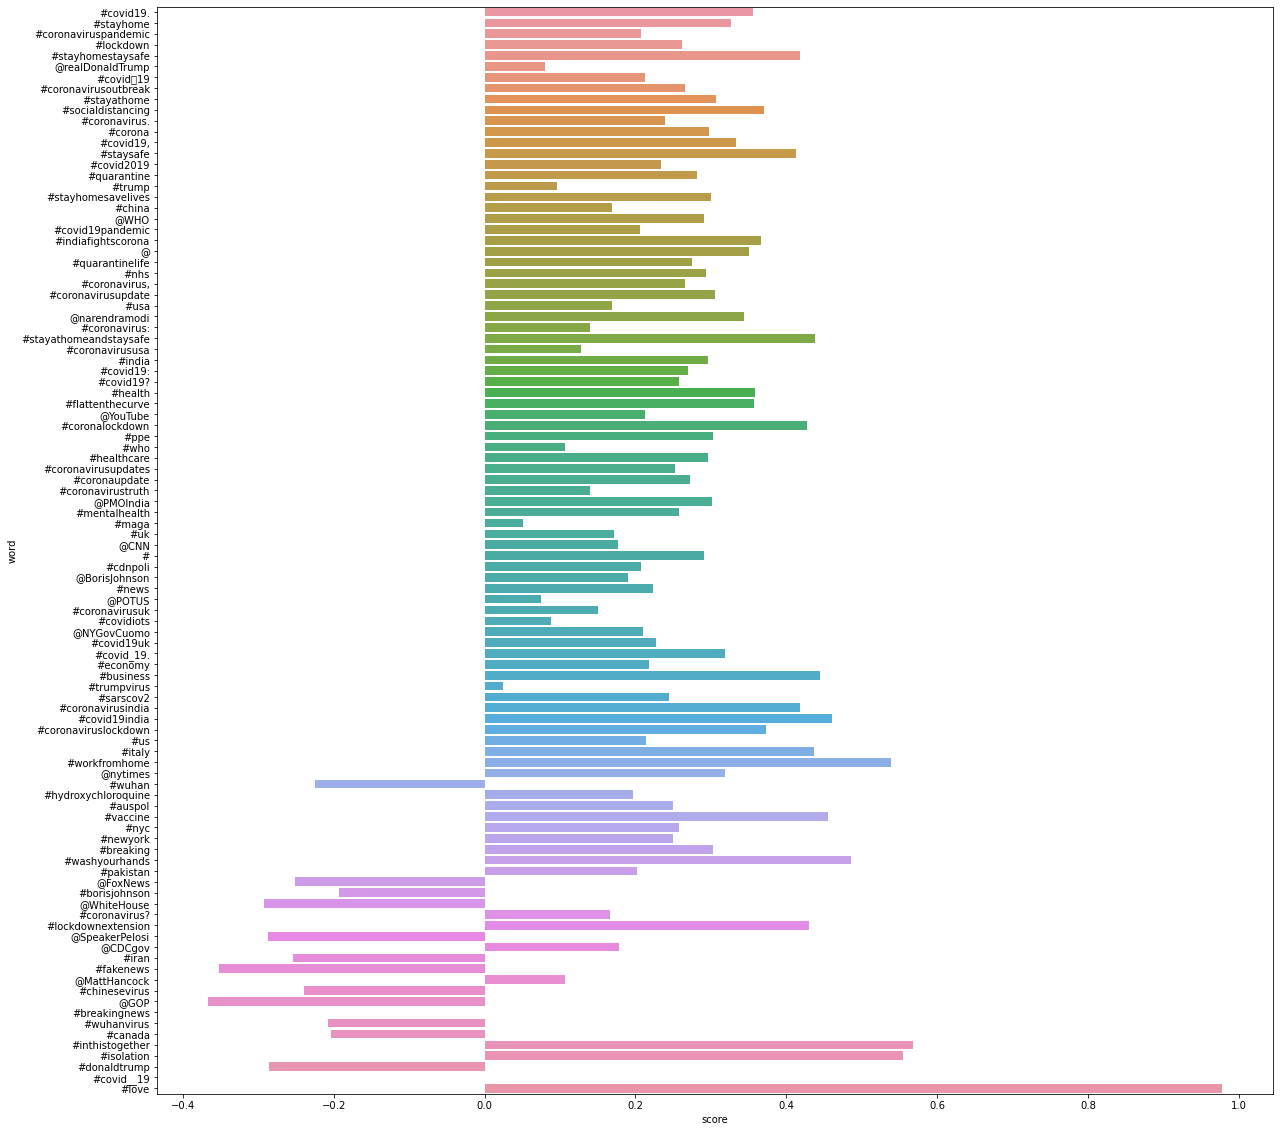

In [19]:
plt.figure(figsize = (20, 20))
sns.barplot(y="word", x="score",data=freq);

In [20]:
# tweet.to_csv('tweet.csv',index=False)